In [26]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

# Modified RPU

In [ ]:
# Define the activation function
def relu(x):
    return np.maximum(0, x)

# Define the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.load("/kaggle/input/rpu_trained_models/keras/one/1/weights1.npy")
        self.bias1 = np.load("/kaggle/input/rpu_trained_models/keras/one/1/bias1.npy")
        self.weights2 = np.load("/kaggle/input/rpu_trained_models/keras/one/1/weights2.npy")
        self.bias2 = np.load("/kaggle/input/rpu_trained_models/keras/one/1/bias2.npy")

    def predict(self, inputs):
        layer1_outputs = relu(np.dot(inputs, self.weights1) + self.bias1)
        return relu(np.dot(layer1_outputs, self.weights2) + self.bias2)

# Define the accuracy function
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

# Define the training function
def train(network, inputs, outputs, update, epochs=100):
    
    best_weights1 = network.weights1
    best_bias1 = network.bias1
    best_weights2 = network.weights2
    best_bias2 = network.bias2
    
    best_accuracy = 0
    random_search_count_all = 0
    random_search_count = 0
    epoch_count = 0
    
    best_parameters_checkpoint = []
    sub_arms = 0
    random_search_count_arms = 0
    arms_op = False
    
    update_or = update
    
    previous_weights1 = 0
    previous_bias1 = 0
    previous_weights2 = 0
    previous_bias2 = 0
    
    while best_accuracy < 0.80:
                        
        temp_weights1 = best_weights1 + np.random.uniform(-update, update, best_weights1.shape)
        temp_bias1 = best_bias1 + np.random.uniform(-update, update, best_bias1.shape)
        temp_weights2 = best_weights2 + np.random.uniform(-update, update, best_weights2.shape)
        temp_bias2 = best_bias2 + np.random.uniform(-update, update, best_bias2.shape)
        
        network.weights1 = temp_weights1
        network.bias1 = temp_bias1
        network.weights2 = temp_weights2
        network.bias2 = temp_bias2

        predictions = network.predict(inputs)
        current_accuracy = accuracy(outputs, predictions)

        random_search_count_all += 1
        
        if not arms_op:
            random_search_count += 1
            print(f'random search (all; current) ({random_search_count_all}; {random_search_count}) | accuracy: {current_accuracy}, best accuracy: {best_accuracy}')
        
        else:
            print(f'random search (all; current) ({random_search_count_all}; {random_search_count_arms}) | accuracy: {current_accuracy}, best accuracy: {best_accuracy}')
                                    
            if arms_op and random_search_count_arms != 10:
                random_search_count_arms += 1
            
            if random_search_count_arms == 10:
                print("Completed sub-arm")
    

        if current_accuracy > best_accuracy:
            best_accuracy = current_accuracy
            best_weights1 = temp_weights1
            best_bias1 = temp_bias1
            best_weights2 = temp_weights2
            best_bias2 = temp_bias2
            epoch_count += 1
            random_search_count = 0
            update = update_or
            
            sub_arms = 0
            arms_op = False
            
            print('------------------------------')
            print(f'Epoch {epoch_count}/{epochs}, Accuracy: {current_accuracy}')
            print('------------------------------')
                  
          
            
            
        if random_search_count == 300 or random_search_count_arms == 10:
                                    
            if random_search_count == 300:
                
                random_search_count = 0
                
                print('\n/////////////////')
                print("Entering arms")
                print('/////////////////')
                best_parameters_checkpoint += [best_weights1, best_bias1, best_weights2, best_bias2]
            
            best_weights1, best_bias1, best_weights2, best_bias2 = temp_weights1, temp_bias1, temp_weights2, temp_bias2
            
            random_search_count_arms = 0
            
            sub_arms += 1
            
            arms_op = True
            
            print("''")
            print("sub_arm")
            print("''")
        
        
        if sub_arms == 7:
            
            best_weights1, best_bias1, best_weights2, best_bias2 = best_parameters_checkpoint[0], best_parameters_checkpoint[1], best_parameters_checkpoint[2], best_parameters_checkpoint[3]
            
            print("''''")
            print("arm")
            print("''''")
            
            sub_arms = 0




# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create and train the neural network
network1 = NeuralNetwork(x_train.shape[1], 64, y_train.shape[1])
train(network1, x_train, y_train, update=0.05)

# Evaluate the network
predictions = network1.predict(x_test)
print(f'Test Accuracy: {accuracy(y_test, predictions)}')

# Basic RPU

In [20]:
training_accuracy = []
test_accuracy = []

# Define the activation function
def relu(x):
    return np.maximum(0, x)

# Define the neural network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias1 = np.random.uniform(-1, 1, hidden_size)
        self.weights2 = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias2 = np.random.uniform(-1, 1, output_size)

    def predict(self, inputs):
        layer1_outputs = relu(np.dot(inputs, self.weights1) + self.bias1)
        return relu(np.dot(layer1_outputs, self.weights2) + self.bias2)

# Define the accuracy function
def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

# Define the training function
def train(network, inputs, outputs, epochs=100):
    best_weights1 = network.weights1
    best_bias1 = network.bias1
    best_weights2 = network.weights2
    best_bias2 = network.bias2
    best_accuracy = 0
    random_search_count = 0
    epoch_count = 0
    start_time = time.time()

    while best_accuracy < 0.5:
        temp_weights1 = best_weights1 + np.random.uniform(-0.05, 0.05, best_weights1.shape)
        temp_bias1 = best_bias1 + np.random.uniform(-0.05, 0.05, best_bias1.shape)
        temp_weights2 = best_weights2 + np.random.uniform(-0.05, 0.05, best_weights2.shape)
        temp_bias2 = best_bias2 + np.random.uniform(-0.05, 0.05, best_bias2.shape)

        network.weights1 = temp_weights1
        network.bias1 = temp_bias1
        network.weights2 = temp_weights2
        network.bias2 = temp_bias2

        predictions = network.predict(inputs)
        current_accuracy = accuracy(outputs, predictions)

        random_search_count += 1
        print(f'random search {random_search_count} accuracy: {current_accuracy}')

        if current_accuracy > best_accuracy:
            
            elapsed_time = time.time() - start_time
            start_time = time.time()
            
            best_accuracy = current_accuracy
            best_weights1 = temp_weights1
            best_bias1 = temp_bias1
            best_weights2 = temp_weights2
            best_bias2 = temp_bias2
            epoch_count += 1
            print('------------------------------')
            print(f'Epoch {epoch_count}, Accuracy: {current_accuracy}, Time: {elapsed_time:.2f}s')
            print('------------------------------')
            
            predictions_test = network.predict(x_test)
            accuracy_test = accuracy(y_test, predictions_test)
            
            training_accuracy.append(best_accuracy)
            test_accuracy.append(accuracy_test)
            
            
            

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create and train the neural network
network = NeuralNetwork(x_train.shape[1], 64, y_train.shape[1])
train(network, x_train, y_train)

# Evaluate the network
predictions = network.predict(x_test)
print(f'Test Accuracy: {accuracy(y_test, predictions)}')

random search 1 accuracy: 0.10748333333333333
------------------------------
Epoch 1, Accuracy: 0.10748333333333333, Time: 0.23s
------------------------------
random search 2 accuracy: 0.10485
random search 3 accuracy: 0.108
------------------------------
Epoch 2, Accuracy: 0.108, Time: 0.52s
------------------------------
random search 4 accuracy: 0.1042
random search 5 accuracy: 0.10943333333333333
------------------------------
Epoch 3, Accuracy: 0.10943333333333333, Time: 0.54s
------------------------------
random search 6 accuracy: 0.10978333333333333
------------------------------
Epoch 4, Accuracy: 0.10978333333333333, Time: 0.29s
------------------------------
random search 7 accuracy: 0.10941666666666666
random search 8 accuracy: 0.10938333333333333
random search 9 accuracy: 0.11191666666666666
------------------------------
Epoch 5, Accuracy: 0.11191666666666666, Time: 0.78s
------------------------------
random search 10 accuracy: 0.1107
random search 11 accuracy: 0.110283

In [25]:
with open("training_accuracies", "w") as f:
    for i in training_accuracy:
        f.write(f"{i} \n")

with open("test_accuracies", "w") as f:
    for i in test_accuracy:
        f.write(f"{i} \n")

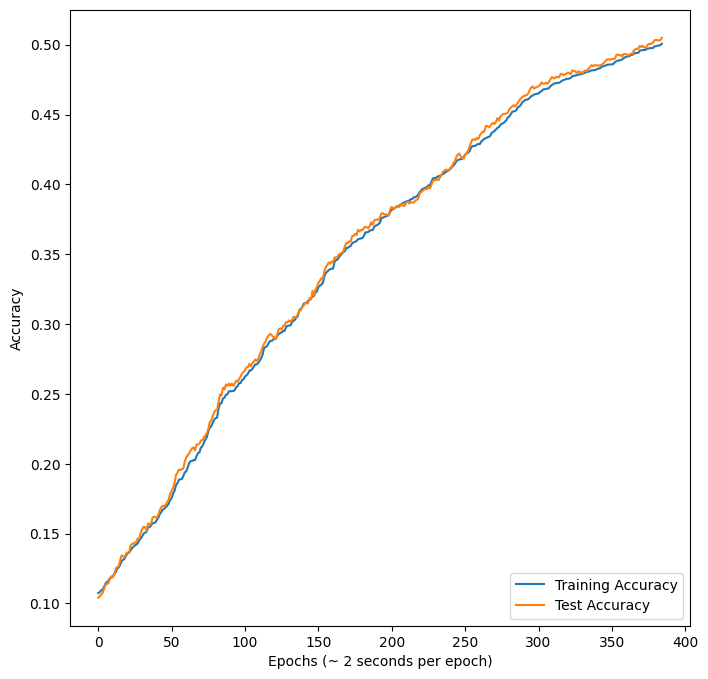

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(range(len(training_accuracy)), training_accuracy, label='Training Accuracy')
plt.plot(range(len(test_accuracy)), test_accuracy, label='Test Accuracy')
plt.xlabel("Epochs (~ 2 seconds per epoch)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()